In [9]:
# import torch
import numpy as np
import matplotlib.pyplot as plt

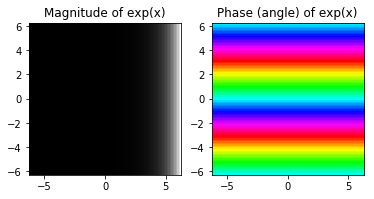

In [7]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
xx = x + 1j * x[:, np.newaxis] # a + ib over complex plane
out = np.exp(xx)
# print('x', x)
# print('xx', xx)
# print('out', out)

plt.subplot(121)
plt.imshow(np.abs(out),
            extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi], cmap='gray')
plt.title('Magnitude of exp(x)')
plt.subplot(122)
plt.imshow(np.angle(out),
           extent=[-2*np.pi, 2*np.pi, -2*np.pi, 2*np.pi], cmap='hsv')
plt.title('Phase (angle) of exp(x)')
plt.show()

In [4]:
s = 'azcbobobegghakl'
max = 55
count = 0
for i in range(len(s)):
    print(s[i], end=',')
print('Longest substring in alphabetical order is:', max)

a,z,c,b,o,b,o,b,e,g,g,h,a,k,l,Longest substring in alphabetical order is: 55


In [5]:
!dir C:\Users\Spurius\Desktop\digit-recognizer\

 Том в устройстве C не имеет метки.
 Серийный номер тома: 2CCD-D327

 Содержимое папки C:\Users\Spurius\Desktop\digit-recognizer

08.02.2019  06:35    <DIR>          .
08.02.2019  06:35    <DIR>          ..
08.02.2019  17:35                39 11.py
08.02.2019  06:35           240 909 sample_submission.csv
08.02.2019  06:35        51 118 296 test.csv
08.02.2019  06:35        76 775 041 train.csv
               4 файлов    128 134 285 байт
               2 папок  33 173 790 720 байт свободно


In [6]:
%run C:\Users\Spurius\Desktop\digit-recognizer\11

True
hello!


Simple function for plotting neural network [from anbrjohn here](https://gist.github.com/anbrjohn/7116fa0b59248375cd0c0371d6107a59)

In [11]:
#!/usr/bin/env python3

"""
Created by @author: craffel
Modified on Sun Jan 15, 2017 by anbrjohn
Modifications: 
    -Changed xrange to range for python 3
    -Added functionality to annotate nodes
"""    

# import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes, layer_text=None):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2], ['x1', 'x2','x3','x4'])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
        - layer_text : list of str
            List of node annotations in top-down left-right order
            
            
        # Need empty strings for unlabeled nodes at start, but not at end
        node_text = ['','','','h1','h2','h3','h4','h5']

        fig = plt.figure(figsize=(12, 12))
        ax = fig.gca()
        draw_neural_net(ax, .1, .9, .1, .9, [3, 5, 2], node_text)
        plt.show()
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    ax.axis('off')
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            x = n*h_spacing + left
            y = layer_top - m*v_spacing
            circle = plt.Circle((x,y), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Node annotations
            if layer_text:
                text = layer_text.pop(0)
                plt.annotate(text, xy=(x, y), zorder=5, ha='center', va='center')


    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

Function for plotting neural network with coefficients [stolen from here :)](https://gist.github.com/craffel/2d727968c3aaebd10359)

In [13]:
def another_neural_net(ax, left, right, bottom, top, layer_sizes,
                        coefs_, 
                        intercepts_,
                        n_iter_, 
                        loss_, 
                        np, plt):
    '''
    Draw a neural network cartoon using matplotilb.

    ```
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])

    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
        - coefs_ :(list) length (n_layers - 1) The ith element in the list represents the weight matrix corresponding to layer i.
        - intercepts_ : (list) length (n_layers - 1)The ith element in the list represents the bias vector corresponding to layer i + 1.
        - n_iter_ : (int) The number of iterations the solver has ran.
        - loss_ : (float) The current loss computed with the loss function.
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Input-Arrows
    layer_top_0 = v_spacing*(layer_sizes[0] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[0]):
        plt.arrow(left-0.18, layer_top_0 - m*v_spacing, 0.12, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/8.,\
                                color='w', ec='k', zorder=4)
    
    plt.plot(n_h_spacing + left, layer_top - m_v_spacing, 'o', mfc='w', mec='k', ls= '-', markersize = 40)
    
    # Add texts
    if n == 0:
        plt.text(left-0.125, layer_top - m*v_spacing, r'$X_{'+str(m+1)+'}$', fontsize=15)
    elif (n_layers == 3) & (n == 1):
        plt.text(n*h_spacing + left+0.00, layer_top - m*v_spacing+ (v_spacing/8.+0.01*v_spacing), r'$H_{'+str(m+1)+'}$', fontsize=15)
    elif n == n_layers -1:
        plt.text(n*h_spacing + left+0.10, layer_top - m*v_spacing, r'$y_{'+str(m+1)+'}$', fontsize=15)
    ax.add_artist(circle)# 
    # Bias-Nodes
    for n, layer_size in enumerate(layer_sizes):
        if n < n_layers -1:
            x_bias = (n+0.5)*h_spacing + left
            y_bias = top + 0.005
            circle = plt.Circle((x_bias, y_bias), v_spacing/8.,\
                                color='w', ec='k', zorder=4)
    # Add texts
            plt.text(x_bias-(v_spacing/8.+0.10*v_spacing+0.01), y_bias, r'$1$', fontsize=15)
            ax.add_artist(circle)   
    # Edges between nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in xrange(layer_size_a):
            print(m)
            for o in xrange(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)
                xm = (n*h_spacing + left)
                xo = ((n + 1)*h_spacing + left)
                ym = (layer_top_a - m*v_spacing)
                yo = (layer_top_b - o*v_spacing)
                rot_mo_rad = np.arctan((yo-ym)/(xo-xm))
                rot_mo_deg = rot_mo_rad*180./np.pi
                xm1 = xm + (v_spacing/8.+0.05)*np.cos(rot_mo_rad)
                if n == 0:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.05)*np.sin(rot_mo_rad)
                else:
                    if yo > ym:
                        ym1 = ym + (v_spacing/8.+0.12)*np.sin(rot_mo_rad)
                    else:
                        ym1 = ym + (v_spacing/8.+0.04)*np.sin(rot_mo_rad)
                plt.text( xm1, ym1,\
                         str(round(coefs_[n][m, o],4)),\
                         rotation = rot_mo_deg, \
                         fontsize = 10)
    # Edges between bias and nodes
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        if n < n_layers-1:
            layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
            layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
    
    for m in xrange(layer_size_a):
        x_bias = (n+0.5)*h_spacing + left
        y_bias = top + 0.005 
    for o in xrange(layer_size_b):
        print(o)
        line = plt.Line2D([x_bias, (n + 1)*h_spacing + left],
                      [y_bias, layer_top_b - o*v_spacing], c='k')
        ax.add_artist(line)
        xo = ((n + 1)*h_spacing + left)
        yo = (layer_top_b - o*v_spacing)
        rot_bo_rad = np.arctan((yo-y_bias)/(xo-x_bias))
        rot_bo_deg = rot_bo_rad*180./np.pi
        xo2 = xo - (v_spacing/8.+0.01)*np.cos(rot_bo_rad)
        yo2 = yo - (v_spacing/8.+0.01)*np.sin(rot_bo_rad)
        xo1 = xo2 -0.05 *np.cos(rot_bo_rad)
        yo1 = yo2 -0.05 *np.sin(rot_bo_rad)
        plt.text( xo1, yo1,\
             str(round(intercepts_[n][o],4)),\
             rotation = rot_bo_deg, \
             fontsize = 10)    
    # Output-Arrows
    layer_top_0 = v_spacing*(layer_sizes[-1] - 1)/2. + (top + bottom)/2.
    for m in xrange(layer_sizes[-1]):
        plt.arrow(right+0.015, layer_top_0 - m*v_spacing, 0.16*h_spacing, 0,  lw =1, head_width=0.01, head_length=0.02)
    # Record the n_iter_ and loss
    plt.text(left + (right-left)/3., bottom - 0.005*v_spacing, \
             'Steps:'+str(n_iter_)+'    Loss: ' + str(round(loss_, 6)), fontsize = 15)

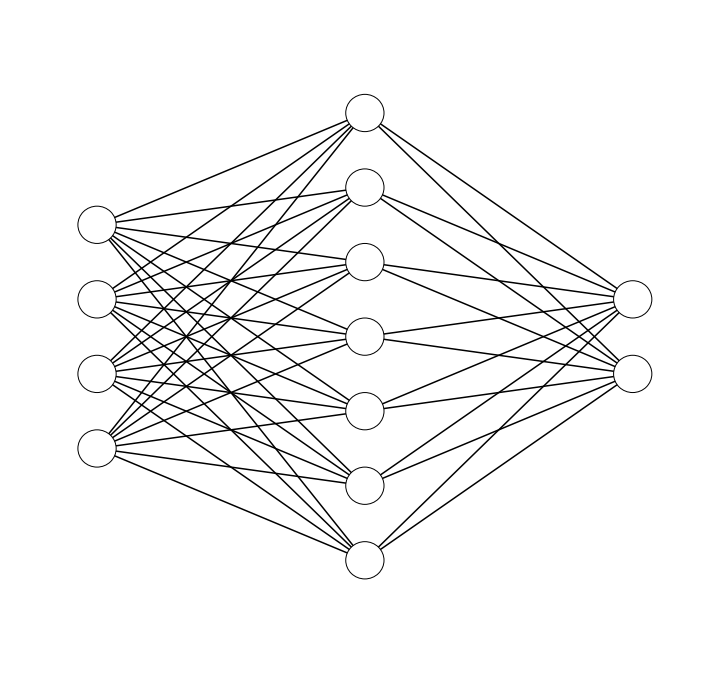

In [12]:
fig = plt.figure(figsize=(12, 12))
draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])